# Hierarchical clustering with 2D toy datasets
***
- 將階層式聚類套用在 2D 樣板資料上, 來觀察幾種不同參數的結果有何不同

In [21]:
# 載入套件
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [22]:
# 設定 2D 樣板資料
n_samples = 1500
random_state = 15

# Make two interleaving half circles.
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
# Generate isotropic Gaussian blobs for clustering.
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
no_structure = np.random.rand(n_samples, 2), None

In [23]:
# 設定群集與繪圖參數
plt.figure(figsize=(10, 8))
default_base = {'n_neighbors': 10, 'n_clusters': 4}
datalist = [(noisy_moons, {'n_clusters': 3}), (blobs, {'n_clusters': 3}), (no_structure, {'n_clusters': 3})]
algorithmslist = ['Average Linkage', 'Complete Linkage', 'Ward Linkage']

<Figure size 720x576 with 0 Axes>

# 作業
* 試著完成剩下三種 2D 樣板資料的繪圖, 並觀察有何不同

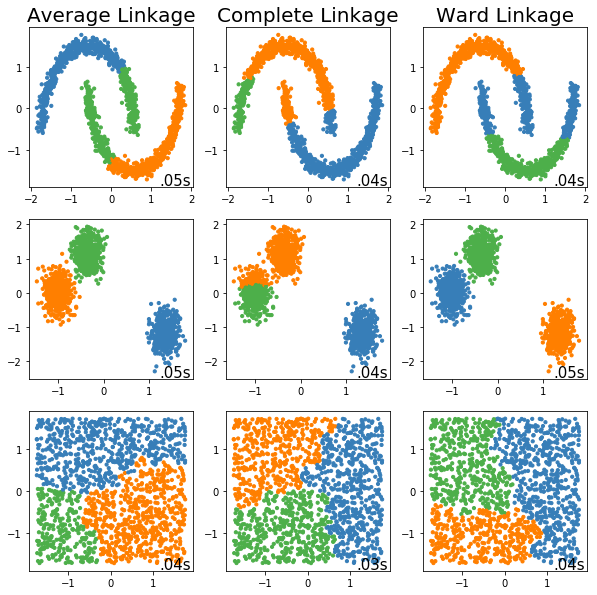

In [24]:
fig, axes = plt.subplots(len(datalist), len(algorithmslist), figsize=(10, 10))

# 執行各種樣板資料的繪圖迴圈
for i_dataset, (dataset, algo_params) in enumerate(datalist):
    # 複製參數與標準化
    params = default_base.copy()
    # 把 algo_params 資料更新到 params 裡面.
    params.update(algo_params)    
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    
    # 設定三種不同參數的 Hierarchical clustering
    ward = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="ward")
    complete = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="complete")
    average = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="average")
    clustering_algorithms = (('Average Linkage', average),
                             ('Complete Linkage', complete),
                             ('Ward Linkage', ward))

    # 繪製三種圖形
    for i_fig, (name, algorithm) in enumerate(clustering_algorithms):
        # t0 / t1 : 紀錄時間差
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)
        
        if i_dataset == 0:
            axes[i_dataset][i_fig].set_title(name, size=20)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        i_axes = axes[i_dataset][i_fig]
        i_axes.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
        i_axes.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'), transform=i_axes.transAxes, size=15,
                 horizontalalignment='right')

plt.show()

* 當 random_state 設定為 15 時，Complete 的表現較差。